In [ ]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import stingray
import numpy as np
from stingray import Lightcurve, Crossspectrum, AveragedCrossspectrum

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
#%matplotlib inline
font_prop = font_manager.FontProperties(size=16)

In [4]:
# import some modules
import numpy as np
import matplotlib.pyplot as plt
import stingray

# choose style of plots, `seaborn-talk` produce nice big figures
plt.style.use('seaborn-talk')



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    #ax.spines['right'].set_color('none')
    #ax.spines['left'].set_color('none')
    #ax.yaxis.set_major_locator(ticker.NullLocator())
    #ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
    
    #ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    #ax.patch.set_alpha(0.9)

In [106]:
marker1=['.','*','+','x','v','^','<','>','1','2','3','4','8','p','P','h','H','X','D','d','|','_']
color1=['lightblue','blue','red','tan','gold','sandybrown','olivedrab','chartreuse','darkgreen','m','skyblue','violet','crimson','aqua','purple','magenta','yellow','lime','turquoise','lightcyan','teal','indigo']

In [6]:
def get_namelist(df,name):
    state=df[name]
    stateori=[]
    for i in state:
        if i not in stateori:
            stateori.append(i)
    return stateori

# load radio data

In [104]:
radiomrk1018=pd.read_excel('/Users/brettlv/Downloads/vla_archival_survey.xlsx',sheet_name='Sheet2')
filename=radiomrk1018


parax='meanepoch'
paraxerr='terr'
parax1='Datestart'
parax2='Datestop'
paray='Fint(mJy)'
parayerr='rms'
paralist='band'

t1=np.array(pd.to_datetime(filename[parax1]),dtype='datetime64[D]')
t2=np.array(pd.to_datetime(filename[parax2]),dtype='datetime64[D]')

tmean=t1+(t2-t1)/2
terr=(t2-t1)/2

filename['meanepoch']=tmean
filename['terr']=terr
namelist=['L', 'C', 'X', 'K',]
#print(namelist)

namelistall=get_namelist(filename,paralist)
print(len(namelistall))
print(namelistall)

6
[nan, 'L', 'C', 'X', 'K', 'C,S']


## radio lightcurve

['L', 'C']


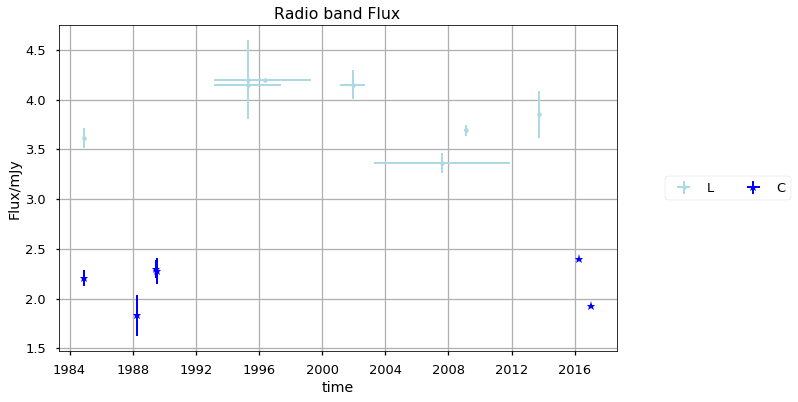

In [120]:
plt.figure(figsize=(10,6))
namelist=['L', 'C']
print(namelist)
for i,m,c, in zip(namelist,marker1[:len(namelist)],color1[:len(namelist)]):
    x=filename[filename[paralist]==i][parax]
    xerr=filename[filename[paralist]==i][paraxerr]
    y=filename[filename[paralist]==i][paray]
    yerr=filename[filename[paralist]==i][parayerr]
    plt.errorbar(x,y,xerr=xerr,yerr=yerr,marker=m,color=c,label=i,fmt='o',elinewidth=2)
    #print(x,i)
    
plt.xlabel('time')
plt.ylabel('Flux/mJy')
plt.title('Radio band Flux')
#plt.legend()
#plt.xlim(1980,2019)
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5),ncol=2)
plt.grid()
plt.show()

# rescale radio flux

In [ ]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.optimize import least_squares, curve_fit
from scipy.stats import f
import emcee
import corner
import os
from timeit import default_timer as timer

def calc_power_law(freq,S0,alpha):
    S = S0 * (freq) ** alpha
    return S

def alpha_calc(data):    
    #Get lightcurve values
    freqs = data['frequency']
    flux = data['Fint(mJy)']
    flux_errs = data['rms']
    
    #Use the scipy curve_fit algorithm to calculate the best fit value
    popt, pcov = curve_fit(calc_power_law, freqs, flux ,sigma=flux_errs, p0=(50,-0.61),absolute_sigma=True)
    
    alpha = popt[1] #Best-fit spectral index
    alpha_err = np.sqrt(np.diag(pcov))[1] #Uncertainty in alpha
    
    return alpha, alpha_err
def scale_data(data, alpha, alpha_err, ref_freq=5.0):
    #calculate a scaling factor for the flux density and uncertainty
    f_scale = (ref_freq/data['frequency'])**alpha
    rms_scale = np.abs(f_scale*np.log(ref_freq/data['frequency'])*alpha_err)
    
    #scale the flux and uncertainty - don't forget to add errors in quadrature
    scaled_flux = data['Fint(mJy)'] * f_scale
    scaled_rms = np.abs(scaled_flux) * np.sqrt((data['rms']/data['Fint(mJy)'])**2 + (rms_scale/f_scale)**2)
    
    #Add two new columns to the data
    data['scaled_flux'] = scaled_flux
    data['scaled_rms'] = scaled_rms    
    return data

In [147]:
sel_data2 = radiomrk1018[radiomrk1018['Datestart'] == '1984-11-28']
alpha, alpha_err = alpha_calc(sel_data2)
print("alpha = %.1f +/- %.2f"%(alpha, alpha_err))


alpha = -0.4 +/- 0.04


In [139]:
bandlist=['L', 'C']
bandL=radiomrk1018[radiomrk1018['band']==bandlist[0]]
bandC=radiomrk1018[radiomrk1018['band']==bandlist[1]]            
sel_data3=bandL.append(bandC)    

In [285]:
sel_data3['meanmjd']=x5mjd

In [287]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode'

In [288]:
mv Mrk1018radiolc.csv /Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/

In [286]:
sel_data3.to_csv('Mrk1018radiolc.csv')

In [148]:
scaleddata=scale_data(sel_data3, alpha=-0.4, alpha_err=0.04, ref_freq=5.0)

In [284]:
scaleddata

,Datestart,Datestop,project,mean epoch year,mean(mjd),terr(mjd),band,frequency,Unnamed: 8,peak(mJy/beam),...,err,rms,unit,proposal,paper,Unnamed: 16,meanepoch,terr,scaled_flux,scaled_rms
2,1993-03-01,1997-05-26,AB0628,NaN,NaN,NaN,L,1.4,1.4GHz,NaN,...,NaN,0.400,NaN,NVSSVIII/65,1998AJ....115.1693C,Condon+1998,1995-04-13,773 days,2.524135,0.272595
3,1984-11-28,1984-11-28,AU0020,NaN,NaN,NaN,L,1.4,1.4GHz,NaN,...,NaN,0.100,NaN,vla_data_reduction,NaN,NaN,1984-11-28,0 days,2.169554,0.125760
10,1993-06-03,1999-04-30,AB0308,NaN,NaN,NaN,L,1.4,1.4GHz,NaN,...,NaN,NaN,NaN,VLANED,2002AJ....124..675C,Condon+2002,1996-05-16,1078 days,2.524135,NaN
11,2001-02-28,2002-09-08,AB0950,NaN,NaN,NaN,L,1.4,1.4GHz,3.340,...,NaN,0.144,mJy,FirstsurveyVIII/71(v03Apr11),2003yCat.8071....0B,Becker+2003,2001-12-03,278 days,2.494085,0.153679
12,1993-03-01,1997-05-26,AB0628,NaN,NaN,NaN,L,1.4,1.4GHz,3.340,...,NaN,0.144,mJy,FirstsurveyVIII/59(v1999Jul),1997ApJ…475..479W,White+1999,1995-04-13,773 days,2.494085,0.153679
14,2003-04-11,2011-12-01,NaN,NaN,NaN,NaN,L,1.4,1.4GHz,2.960,...,NaN,0.101,mJy,First12VIII/90(v12Feb16),2012yCat.8090....0B,Becker+2012,2007-08-06,1578 days,2.019308,0.119400
17,2013-09-07,2013-09-23,13B-272,NaN,NaN,NaN,L,1.4,1.4GHz,3.942,...,0.416,0.240,mJy/beam,deep-wideStripe82survey,2016MNRAS.460.4433H,Heywood+2016,2013-09-15,8 days,2.313790,0.186238
18,2008-12-21,2009-04-03,AR685,NaN,NaN,NaN,L,1.4,1.4GHz,2.450,...,NaN,0.055,mJy,J/AJ/142/3/stripe82,2011AJ....142....3H,Hodge+2011,2009-02-10,51 days,2.217633,0.117657
21,2012-05-24,2012-05-24,NaN,NaN,NaN,NaN,L,NaN,NaN,NaN,...,NaN,NaN,NaN,GBT,NaN,NaN,2012-05-24,0 days,NaN,NaN
4,1984-11-28,1984-11-28,AU0020,NaN,NaN,NaN,C,4.8,4.8GHz,NaN,...,NaN,0.080,NaN,vla_data_reduction,NaN,NaN,1984-11-28,0 days,2.174206,0.078784


In [150]:
scaleddata['meanepoch'],scaleddata['Fint(mJy)'],scaleddata['scaled_flux']

(2    1995-04-13
 3    1984-11-28
 10   1996-05-16
 11   2001-12-03
 12   1995-04-13
 14   2007-08-06
 17   2013-09-15
 18   2009-02-10
 21   2012-05-24
 4    1984-11-28
 5    1988-04-10
 6    1989-06-15
 7    1989-07-25
 23   2016-04-03
 28   2017-01-15
 Name: meanepoch, dtype: datetime64[ns], 2     4.20
 3     3.61
 10    4.20
 11    4.15
 12    4.15
 14    3.36
 17    3.85
 18    3.69
 21     NaN
 4     2.21
 5     1.83
 6     2.30
 7     2.28
 23    2.40
 28    1.93
 Name: Fint(mJy), dtype: float64, 2     2.524135
 3     2.169554
 10    2.524135
 11    2.494085
 12    2.494085
 14    2.019308
 17    2.313790
 18    2.217633
 21         NaN
 4     2.174206
 5     1.800361
 6     2.262749
 7     2.243073
 23    2.581569
 28    2.076012
 Name: scaled_flux, dtype: float64)

# load xrt optical data

## xrt

In [11]:
xrtdatalv=pd.read_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/Mrkxrtmore85.csv')
xrtfitlv=pd.read_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/xspecfitdatamorethan85.txt',header=None)
xrtfitlv.columns=['powerlawindex','indexerr','bins','rechied','flux','fluxrangeleft','fluxrangeright','obs_id']

In [77]:
xrtdatalv_less85=pd.read_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/Mrkxrtless85.csv')
xrtfitlv_less85=pd.read_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/xspecfitdatalessthan85.txt',header=None)
xrtfitlv_less85.columns=['powerlawindex','indexerr','bins','rechied','flux','fluxrangeleft','fluxrangeright','obs_id']

## husemann2016 and optical

In [82]:
optical=pd.read_excel('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/MRK1018optical.xlsx')
husemann2016=pd.read_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/husemann2016.csv')

In [78]:
xrtdatalv_less85.columns,

(Index(['xrttime', 'obsids', 'countrates'], dtype='object'),)

In [14]:
optical.columns

Index(['timeoptical', 'magAB', 'band', 'freqoptical', 'instrument',
       'fluxoptical', 'timeradio', 'freqradio', 'fluxradio', 'timexray',
       'fluxxray', 'gamma'],
      dtype='object')

# all lightcurve

In [281]:
xrtfitlv

,powerlawindex,indexerr,bins,rechied,flux,fluxrangeleft,fluxrangeright,obs_id
0,1.92181,0.052557,95,0.95700,8.836400e-12,8.376000e-12,9.392000e-12,30955001
1,1.98472,0.049815,103,1.02840,7.334900e-12,6.853000e-12,7.753000e-12,30955002
2,1.95257,0.044985,128,0.90176,8.532100e-12,7.975000e-12,9.092000e-12,30955003
3,1.91460,0.034111,185,0.92019,1.104800e-11,1.064000e-11,1.151000e-11,35166001
4,1.78246,0.042172,138,1.01470,9.329300e-12,8.894000e-12,9.755000e-12,35776001
5,1.44149,0.258049,8,1.13000,2.447800e-12,1.877000e-12,3.694000e-12,35776006
6,1.94941,0.242180,7,0.65000,1.791000e-12,1.309000e-12,2.150000e-12,35776007
7,1.44693,0.110132,26,1.11200,7.295800e-12,6.487000e-12,8.334000e-12,49654002
8,1.47261,0.293637,7,0.85200,1.655600e-12,1.351000e-12,2.336000e-12,49654004
9,1.75090,0.149375,18,0.73520,1.485200e-12,1.273000e-12,1.749000e-12,80898001


In [271]:
xrtfitlv_less85

,powerlawindex,indexerr,bins,rechied,flux,fluxrangeleft,fluxrangeright,obs_id
0,2.093740,0.290116,39,0.8372,9.085600e-13,5.906000e-13,1.322000e-12,35776002
1,1.552190,0.268242,34,3.4910,1.431800e-12,9.443000e-13,1.907000e-12,35776003
2,1.478610,0.217306,48,1.1860,2.081100e-12,1.649000e-12,2.656000e-12,35776004
3,1.662210,0.221918,49,1.2110,1.524600e-12,1.321000e-12,2.129000e-12,35776005
4,1.965050,0.252630,41,0.9942,1.757000e-12,1.221000e-12,2.399000e-12,35776008
5,1.457510,0.315916,44,0.4379,2.231600e-12,1.512000e-12,3.384000e-12,35776010
6,1.350480,0.229157,45,0.7534,2.196900e-12,1.698000e-12,3.195000e-12,35776011
7,2.162130,0.471816,15,1.2140,1.466200e-12,8.406000e-13,2.603000e-12,35776012
8,1.411300,0.191328,60,0.7105,2.604900e-12,2.063000e-12,3.237000e-12,35776014
9,1.614630,0.293360,31,0.7624,2.907500e-12,1.875000e-12,3.950000e-12,35776015


## load data

In [250]:
x1 = optical['timeoptical']
y1 = optical['magAB']
x2=xrtdatalv['xrttime']#counts more than 85
y2 = xrtfitlv['flux']
p2=xrtfitlv['powerlawindex']
errp2=xrtfitlv['indexerr']


x3=xrtdatalv_less85['xrttime']
y3=xrtfitlv_less85['flux']
p3=xrtfitlv_less85['powerlawindex']
errp3=xrtfitlv_less85['indexerr']

x4=husemann2016['date']
y4=husemann2016['flux']
erry4=husemann2016['ferr']
p4=husemann2016['gamma']
errp4=husemann2016['gerr']

x5=scaleddata['meanepoch']#rescale to 5GHz
y5=scaleddata['scaled_flux']
erry5=scaleddata['scaled_rms']

In [257]:
husemann2016

,Unnamed: 0,date,ins,expt,offaxisangle,Nbin,chi,gamma,Unnamed: 8,gerr,flux,Unnamed: 11,ferr
0,0,53587,(S),5.2,2.6,113,(1.1),1.93,±,0.05,1.11,±,0.08
1,1,54271,(S),3.3,4.4,58,(1.1),1.91,±,0.08,0.92,±,0.10
2,2,54273,(S),3.5,6.3,61,(1.2),1.95,±,0.08,0.78,±,0.07
3,3,54275,(S),4.1,5.9,73,(1.0),1.95,±,0.07,0.85,±,0.07
4,4,54628,(S),4.8,1.2,81,(1.0),1.76,±,0.06,0.97,±,0.08
5,5,55527,(C),22.7,0.0,169,(1.2),1.68,±,0.04,0.92,±,0.02
6,6,56450,(S),1.3,2.0,14,(1.1),1.42,±,0.18,0.79,±,0.16
7,7,56817,(S),2.1,4.5,3,(0.5),1.50,±,0.60,0.16,±,0.09
8,8,57429,(S),3.7,3.7,9,(1.3),1.75,±,0.27,0.15,±,0.05
9,9,57434,(S),3.1,3.9,8,(0.5),1.33,±,0.26,0.25,±,0.08


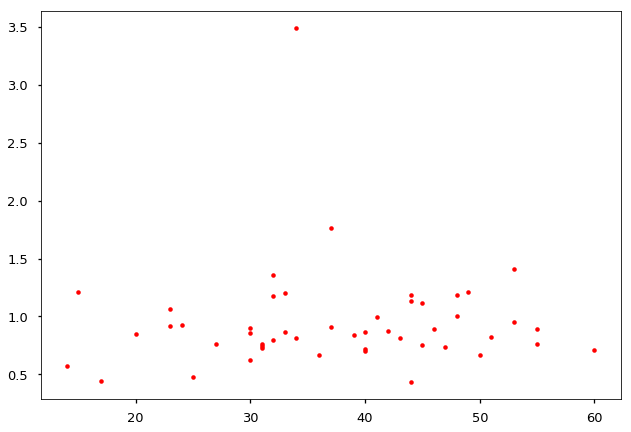

In [279]:
plt.plot(xrtfitlv_less85['bins'],xrtfitlv_less85['rechied'],'r.')
plt.show()

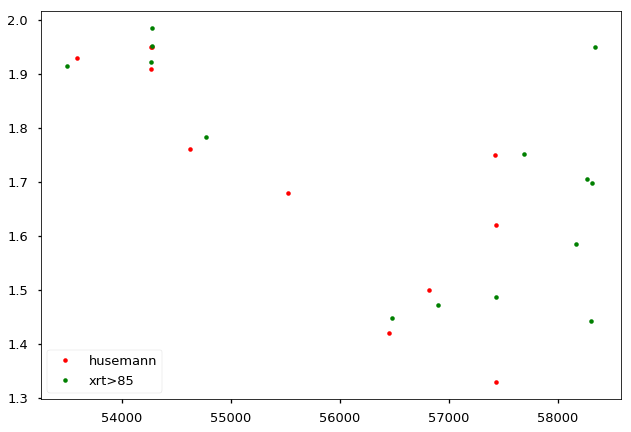

In [269]:
plt.plot(x4mjd,p4,'r.',label='husemann')
plt.plot(x2mjd,p2,'g.',label='xrt>85')
#plt.plot(x3mjd,p3,'b.',label='xrt<85')
plt.legend()
plt.show()

## time convert

In [184]:
from datetime import timedelta, datetime

def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes

def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False

def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd   

    

In [185]:
x1new=convert_partial_year(x1)
x1mjd=Time(x1new).mjd
x2mjd=convert_mjd(pd.to_datetime(x2))
x3mjd=convert_mjd(pd.to_datetime(x3))
x4mjd=husemann2016['date']
x5mjd=convert_mjd(pd.to_datetime(x5))

In [289]:
optical['mjd']=x1mjd

In [291]:
optical.to_csv('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/Mrk1018opticallc.csv')

# Optical vs X-ray

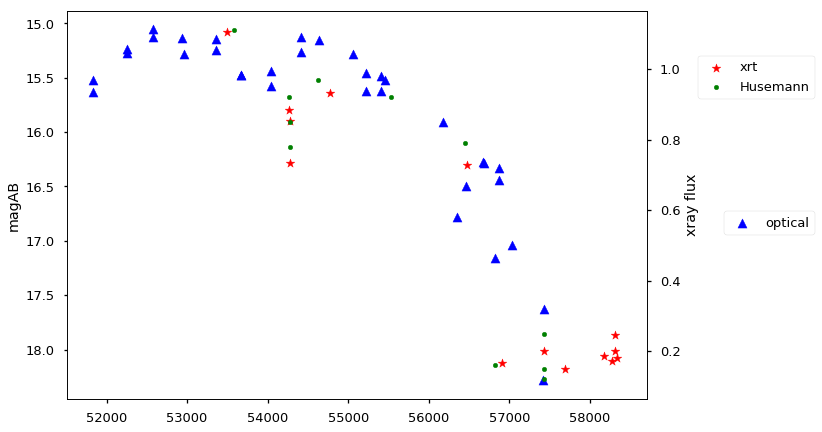

In [191]:
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(x1mjd, y1,marker='^',color='b',label='optical')
ax1.invert_yaxis()
ax1.set_ylabel('magAB')
ax1.legend(bbox_to_anchor=(1.3, 0.5))
#ax1.set_xlim([2002, 2018])
#ax1.set_title("Double Y axis")


ax2 = ax1.twinx()  # this is the important function
#ax2 = fig.add_subplot(212)
ax2.scatter(x2mjd, y2*10**11, marker='*',color='r',label='xrt')
ax2.scatter(husemann2016['date'],husemann2016['flux'],marker='.',color='g',label='Husemann')
#ax2.set_xlim([2002, 2018])
ax2.set_ylabel('xray flux')
ax2.set_xlabel('time')
plt.legend(bbox_to_anchor=(1.3, 0.9))
plt.show()

# AB magnitude System
This magnitude system is defined such that, when monochromatic flux f is measured in erg sec^-1 cm^-2 Hz^-1,
m(AB) = -2.5 log(f) - 48.60
where the value of the constant is selected to define m(AB)=V for a flat-spectrum source. In this system, an object with constant flux per unit frequency interval has zero color.
References:

Oke, J.B. 1974, ApJS, 27, 21

In [28]:
opticalflux=(-48.60-optical['magAB'])/2.5

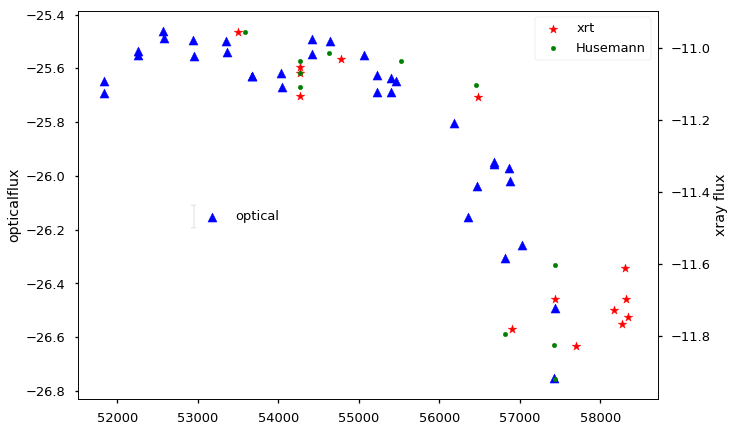

In [225]:
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(x1mjd, opticalflux,marker='^',color='b',label='optical')
#ax1.invert_yaxis()
ax1.set_ylabel('opticalflux')
ax1.legend(bbox_to_anchor=(0.2, 0.5),ncol=1, mode="expand", borderaxespad=0.)
#ax1.set_xlim([2002, 2018])
#ax1.set_title("Double Y axis")


ax2 = ax1.twinx()  # this is the important function
#ax2 = fig.add_subplot(212)
ax2.scatter(x2mjd, np.log10(y2), marker='*',color='r',label='xrt')
ax2.scatter(husemann2016['date'],np.log10(husemann2016['flux']*1.0e-11),marker='.',color='g',label='Husemann')
#ax2.set_xlim([2002, 2018])
ax2.set_ylabel('xray flux')
ax2.set_xlabel('time')
#plt.legend(bbox_to_anchor=(0.8, 0.9),ncol=1,loc='upper right', mode="expand", borderaxespad=0., shadow=True)
ax2.legend(bbox_to_anchor=(1.2, 0.9),ncol=1, mode="expand", borderaxespad=0.)
plt.legend()
plt.show()

In [ ]:
def

# Radio vs X-ray

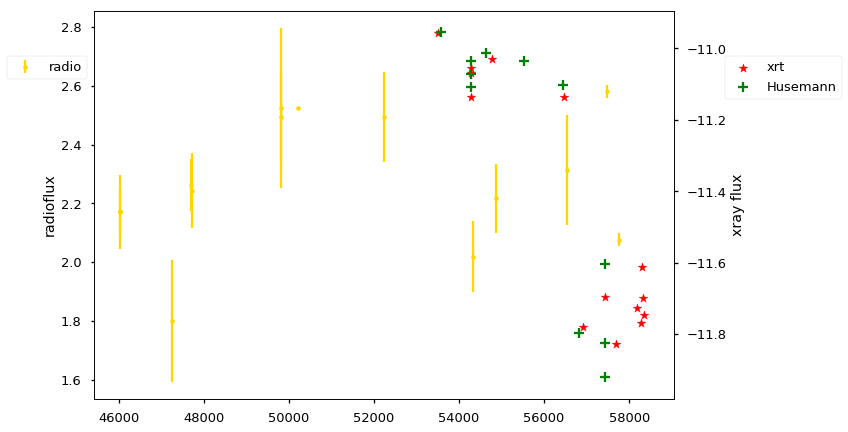

In [252]:
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.errorbar(x5mjd, y5,yerr=erry5,marker='.',color='gold',label='radio',fmt='.')
#ax1.invert_yaxis()
ax1.set_ylabel('radioflux')
ax1.legend(bbox_to_anchor=(0, 0.9),ncol=1)
#plt.legend()
#ax1.set_xlim([2002, 2018])
#ax1.set_title("Double Y axis")


ax2 = ax1.twinx()  # this is the important function
#ax2 = fig.add_subplot(212)
ax2.scatter(x2mjd, np.log10(y2), marker='*',color='r',label='xrt')
ax2.scatter(husemann2016['date'],np.log10(husemann2016['flux']*1.0e-11),marker='+',color='g',label='Husemann')
#ax2.set_xlim([2002, 2018])
ax2.set_ylabel('xray flux')
ax2.set_xlabel('time')
#plt.legend(bbox_to_anchor=(0.8, 0.9),ncol=1,loc='upper right', mode="expand", borderaxespad=0., shadow=True)
ax2.legend(bbox_to_anchor=(1.3, 0.9),ncol=1)
#plt.legend()
plt.show()

In [35]:
husemann2016

,Unnamed: 0,date,ins,expt,offaxisangle,Nbin,chi,gamma,Unnamed: 8,gerr,flux,Unnamed: 11,ferr
0,0,53587,(S),5.2,2.6,113,(1.1),1.93,±,0.05,1.11,±,0.08
1,1,54271,(S),3.3,4.4,58,(1.1),1.91,±,0.08,0.92,±,0.10
2,2,54273,(S),3.5,6.3,61,(1.2),1.95,±,0.08,0.78,±,0.07
3,3,54275,(S),4.1,5.9,73,(1.0),1.95,±,0.07,0.85,±,0.07
4,4,54628,(S),4.8,1.2,81,(1.0),1.76,±,0.06,0.97,±,0.08
5,5,55527,(C),22.7,0.0,169,(1.2),1.68,±,0.04,0.92,±,0.02
6,6,56450,(S),1.3,2.0,14,(1.1),1.42,±,0.18,0.79,±,0.16
7,7,56817,(S),2.1,4.5,3,(0.5),1.50,±,0.60,0.16,±,0.09
8,8,57429,(S),3.7,3.7,9,(1.3),1.75,±,0.27,0.15,±,0.05
9,9,57434,(S),3.1,3.9,8,(0.5),1.33,±,0.26,0.25,±,0.08


In [65]:
l1 = [x1mjd,opticalflux]
l2= [x2mjd,np.log10(y2)]
head = ["mjdtime" , "flux" ]

df1 = pd.DataFrame(l1 , index = head).T
#df1['err']=0.1
df1=df1.sort_values(by=['mjdtime'])
df1.to_csv("/Users/brettlv/timing_analysis/pydcf/example/Mrkopticalmjd.csv", header=None,index=None, encoding = "utf-8")

df2 = pd.DataFrame(l2 , index = head).T
df2=df2.sort_values(by=['mjdtime'])
#df2['err']=0.1
df2.to_csv("/Users/brettlv/timing_analysis/pydcf/example/Mrkxrtmjd.csv" , header=None,index=None,encoding = "utf-8")

The reported correlation relates to the first time series. That is, how the first time series should be shifted to match the second, ie: ts2 = ts1 - correlation. Positive correlation is ts1 leading ts2, negative correlation is ts1 lagging ts2.

In [ ]:
python3 dcf.py example/Mrkopticalmjd.csv example/Mrkxrtmjd.csv -2000 2000 20 -v -w=gauss -p=2 -o

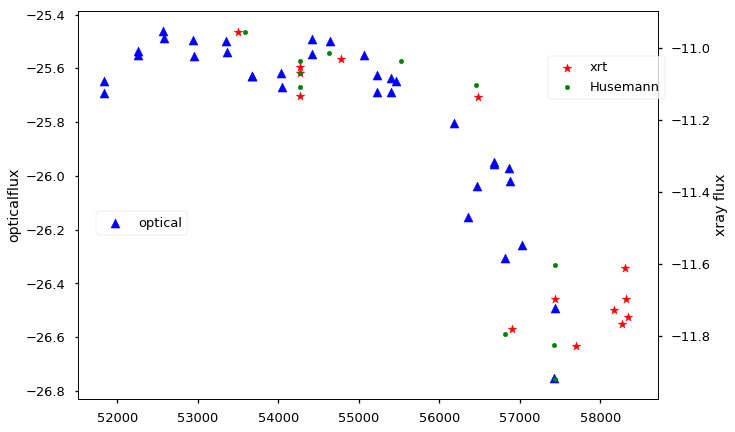

In [75]:
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.scatter(x1mjd, opticalflux,marker='^',color='b',label='optical')
#ax1.invert_yaxis()
ax1.set_ylabel('opticalflux')
ax1.legend(bbox_to_anchor=(0.2, 0.5))
#ax1.set_xlim([2002, 2018])
#ax1.set_title("Double Y axis")


ax2 = ax1.twinx()  # this is the important function
#ax2 = fig.add_subplot(212)
ax2.scatter(x2mjd, np.log10(y2), marker='*',color='r',label='xrt')
ax2.scatter(husemann2016['date'],np.log10(husemann2016['flux']*1.0e-11),marker='.',color='g',label='Husemann')
#ax2.set_xlim([2002, 2018])
ax2.set_ylabel('xray flux')
ax2.set_xlabel('time')
plt.legend(bbox_to_anchor=(0.8, 0.9))
plt.show()